In [1]:
import numpy as np
import matplotlib.pyplot as plt

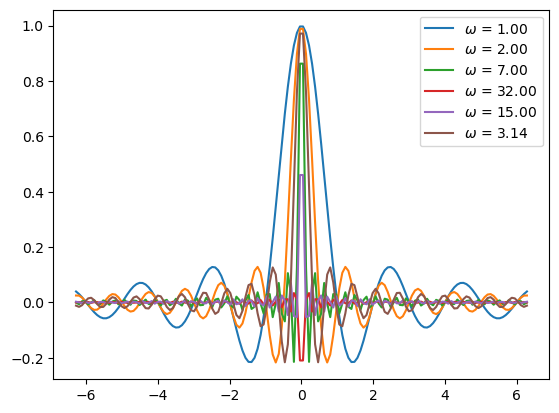

In [13]:
x = np.linspace(-2*np.pi,2*np.pi,150)
omega = np.array([1,2,7,32,15,np.pi])
for i in range(len(omega)):
    y = np.sinc(omega[i]*x)
    plt.plot(x,y,label=r'$\omega$ = %2.2f' %omega[i])
plt.legend()
plt.show()

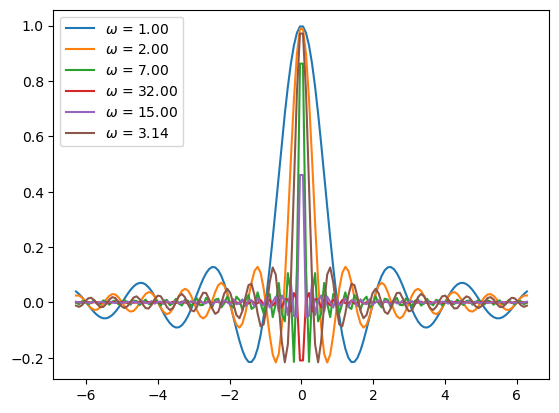

In [17]:
x = np.linspace(-2*np.pi,2*np.pi,150)
omegas = np.array([1,2,7,32,15,np.pi])
for omega in omegas:
    y = np.sinc(omega*x)
    plt.plot(x,y,label=r'$\omega$ = %2.2f' %omega)
plt.legend(loc=2)
plt.show()

Derivada asimétrica
$$
f'_i = \frac{f_{i+1} - f_i}{x_{i+1}-x_i}
$$

Derivada simétrica
$$
f'_i = \frac{f_{i+1} - f_{i-1}}{x_{i+1}-x_{i-1}}
$$

In [34]:
def deriv_Euler(f,x):
    df = np.zeros_like(f)
    for i in range(len(x)-1):
        df[i] = (f[i+1]-f[i])/(x[i+1]-x[i])
    df[-1] = -(f[-2]-f[-1])/(x[-1]-x[-2])
    return df

def deriv_sim(f,x):
    df = np.zeros_like(f)
    for i in range(1,len(x)-1):
        df[i] = (f[i+1]-f[i-1])/(x[i+1]-x[i-1])
    df[0] = (f[1]-f[0])/(x[1]-x[0])
    df[-1] = -(f[-2]-f[-1])/(x[-1]-x[-2])
    return df

h= 0.1282282715750936 	 h^2= 0.016442489631135954 	 h^3= 0.0021083920257919616


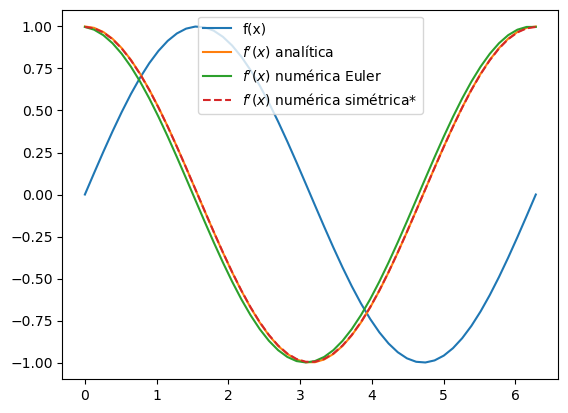

In [36]:
x = np.linspace(0,2*np.pi)
h = x[1]-x[0]
print('h=',h,'\t h^2=',h**2,'\t h^3=',h**3)
y = np.sin(x)
dy_a = np.cos(x)
dy_n = deriv_Euler(y,x)
dy_s = deriv_sim(y,x)
plt.plot(x,y,label='f(x)')
plt.plot(x,dy_a,label=r"$f'(x)$ analítica")
plt.plot(x,dy_n,label=r"$f'(x)$ numérica Euler")
plt.plot(x,dy_s,'',label=r"$f'(x)$ numérica simétrica*")
plt.legend()
plt.show()

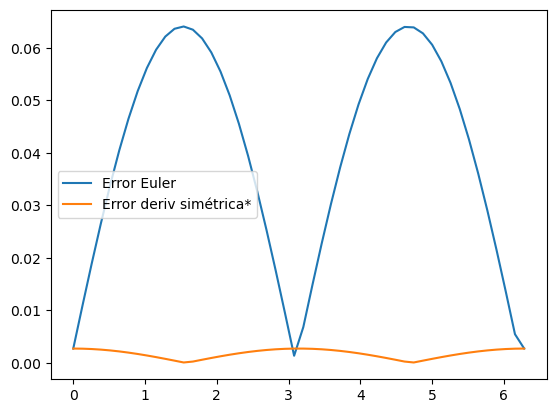

In [38]:
dif_E = abs(dy_a - dy_n)
dif_s = abs(dy_a - dy_s)
plt.plot(x,dif_E,label='Error Euler')
plt.plot(x,dif_s,label='Error deriv simétrica*')
plt.legend()
plt.show()

Derivada asimétrica de segundo orden
$$
f'_i = \frac{1.5f_{i} + 2f_{i+1} - 0.5f_{i+2}}{x_{i+1}-x_i}
$$

In [39]:
def deriv_h2(f,x):
    df = np.zeros_like(f)
    for i in range(len(x)-2):
        df[i] = (-1.5*f[i] + 2*f[i+1] - 0.5*f[i+2])/(x[i+1]-x[i])
    df[-2] = -(-1.5*f[-2] + 2*f[-3] - 0.5*f[-4])/(x[-2]-x[-3])
    df[-1] = -(-1.5*f[-1] + 2*f[-2] - 0.5*f[-3])/(x[-1]-x[-2])
    return df

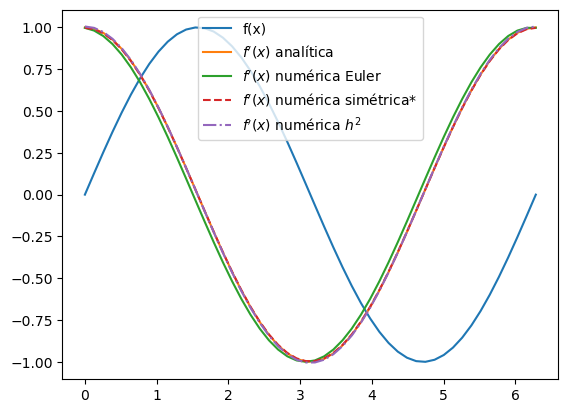

In [41]:
dy_n2 = deriv_h2(y,x)
plt.plot(x,y,label='f(x)')
plt.plot(x,dy_a,label=r"$f'(x)$ analítica")
plt.plot(x,dy_n,label=r"$f'(x)$ numérica Euler")
plt.plot(x,dy_s,'--',label=r"$f'(x)$ numérica simétrica*")
plt.plot(x,dy_n2,'-.',label=r"$f'(x)$ numérica $h^2$")
plt.legend()
plt.show()

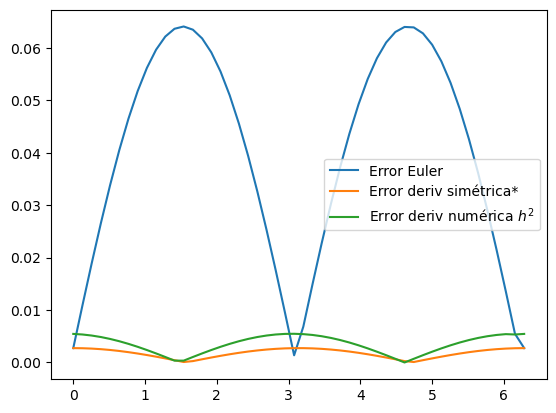

In [42]:
dif_E = abs(dy_a - dy_n)
dif_s = abs(dy_a - dy_s)
dif_n2 = abs(dy_a - dy_n2)
plt.plot(x,dif_E,label='Error Euler')
plt.plot(x,dif_s,label='Error deriv simétrica*')
plt.plot(x,dif_n2,label='Error deriv numérica $h^2$')
plt.legend()
plt.show()